# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [18]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [3]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [33]:
df_raw.shape

(400, 4)

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger GPA because the range points between min and max are larger.

#### Question 4. Drop data points with missing data


In [12]:
df_raw2 = df_raw.dropna()
print df_raw2

     admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.66       1.0
26       1  620.0  3.61       1.0
27       1  520.0  3.74       4.0
28       1  78

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: There is now count of 397 rows of data in total

In [13]:
df_raw2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

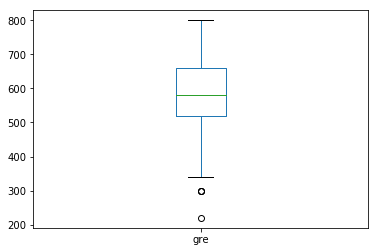

In [16]:
df_raw['gre'].plot(kind='box')

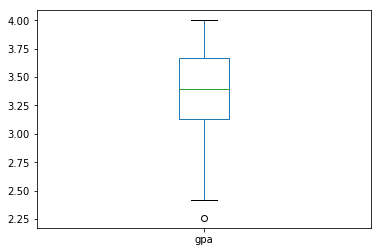

In [17]:
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: That Gre has a higher clustered mean and range than GPA, GRE also has two outliers compared to GPA's one outlier

#### Question 8. Describe each distribution 

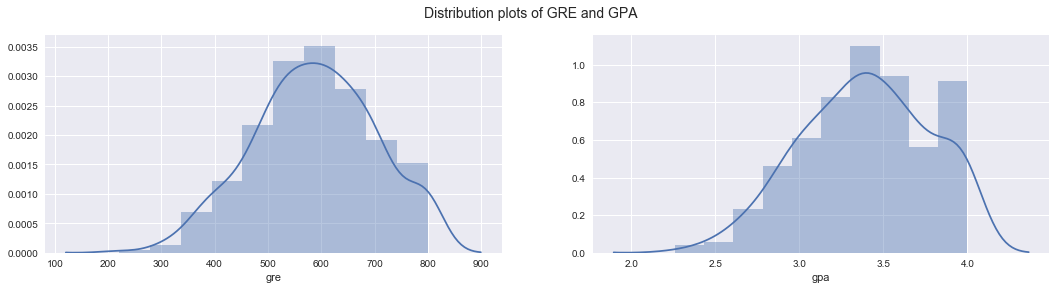

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df_raw2.gre, ax=axs[0], bins=10)
sns.distplot(df_raw2.gpa, ax=axs[1], bins=10)
fig.suptitle("Distribution plots of GRE and GPA", fontsize=14)
plt.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: no, then GPA distribution is skewed

In [29]:
df_raw2.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [30]:
df_raw2.kurtosis()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: yes, the

#### Question 11. Which of our variables are potentially colinear? 

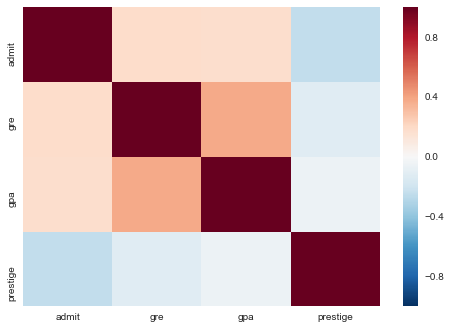

In [27]:
# create a correlation matrix for the data
sns.heatmap(df_raw2.corr())
plt.show()

#### Question 12. What did you find?

Answer: that GPA and GRE are highly correlated

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Check for missing data
2. drop missing data
3. check for any anomalies in the data
4. Clean the data
5. make necessary statical adjustments
6. analyse the data

#### Question 14. What is your hypothesis? 

Answer: To determine the direction correlation between the Grad school admission rates and the prestige of undergraduate schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data


In [39]:
df_raw.fillna(0)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [40]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### 2. Bonus: Log transform the skewed data

In [43]:
lm = df_raw.ols(formula="gre ~ gpa", data=hdb).fit()

AttributeError: 'DataFrame' object has no attribute 'ols'

#### 3. Advanced: Impute missing data



In [35]:
df_raw["gpa"].fillna(df_raw["gpa"].mean(), inplace=True)
df_raw["gre"].fillna(df_raw["gre"].mean(), inplace=True)
df_raw["prestige"].fillna(df_raw["prestige"].mean(), inplace=True)
df_raw

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [38]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000
